In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('gpt_eng_to_spa.csv')

In [17]:
df

,Original,gpt4,gpt4_NEU,gpt4_NEG,gpt4_POS,Original_NEU,Original_NEG,Original_POS
0,"1. Hi everybody, it's your old pal Sarah. Over...","1. Hola a todos, soy vuestra vieja amiga Sarah...",0.032806,0.674775,0.292419,0.018466,0.956572,0.024962
1,2. So ridiculous. And I had to wear Spanx unde...,2. Tan ridículo. Y tuve que llevar Spanx debaj...,0.933835,0.062783,0.003382,0.971826,0.025568,0.002605
2,3. Not that there's anything wrong with that. ...,3. No es que haya algo malo en eso. Pero tenía...,0.077322,0.679731,0.242947,0.255475,0.731315,0.013210
3,4. And when I can't wear a tight skirt without...,4. Y cuando no puedo llevar una falda ajustada...,0.892831,0.099999,0.007170,0.322705,0.657761,0.019533
4,5. It burns like fire. So I was wearing these ...,5. Arde como fuego. Así que llevaba estos Span...,0.781700,0.207685,0.010615,0.524018,0.465672,0.010309
...,...,...,...,...,...,...,...,...
723,"That sounds awesome. Iâm Chloe, she/her/hers.","Eso suena increÃ­ble. Soy Chloe, ella/suya.",0.035091,0.638529,0.326381,0.001252,0.011510,0.987239
724,The awesome. I am X.,IncreÃ­ble. Soy X.,0.065791,0.236075,0.698134,0.006585,0.893305,0.100110
725,"X, Itâs nice to meet you. Honestly, itâs r...","X, es un placer conocerte. Honestamente, es re...",0.002553,0.017443,0.980003,0.001821,0.005689,0.992491
726,Absolutely. Like this is my first gay event li...,Absolutamente. Como que este es mi primer even...,0.008541,0.119146,0.872312,0.001262,0.026907,0.971831


In [4]:
ordered_columns = ['Original', 'gpt4',
                   'Original_POS', 'gpt4_POS', 
                   'Original_NEU', 'gpt4_NEU', 
                   'Original_NEG', 'gpt4_NEG']

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]

In [5]:
# Find the index of the maximum sentiment score for each row for original sentiments
df['original_highest_sent'] = df[['Original_POS', 'Original_NEU', 'Original_NEG']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for GPT-4 sentiments
df['gpt4_highest_sent'] = df[['gpt4_POS', 'gpt4_NEU', 'gpt4_NEG']].idxmax(axis=1)

In [6]:
# Remove the prefix "Original_" from each entry in the 'original_highest_sent' column
df['original_highest_sent'] = df['original_highest_sent'].str.replace('Original_', '')

# Remove the prefix "gpt4_" from each entry in the 'gpt4_highest_sent' column
df['gpt4_highest_sent'] = df['gpt4_highest_sent'].str.replace('gpt4_', '')

In [7]:
# Calculate the number of matching values between original and GPT-4 sentiments
matching_count = (df['original_highest_sent'] == df['gpt4_highest_sent']).sum()
matching_count

548

In [8]:
df

,Original,gpt4,Original_POS,gpt4_POS,Original_NEU,gpt4_NEU,Original_NEG,gpt4_NEG,original_highest_sent,gpt4_highest_sent
0,"1. Hi everybody, it's your old pal Sarah. Over...","1. Hola a todos, soy vuestra vieja amiga Sarah...",0.024962,0.292419,0.018466,0.032806,0.956572,0.674775,NEG,NEG
1,2. So ridiculous. And I had to wear Spanx unde...,2. Tan ridículo. Y tuve que llevar Spanx debaj...,0.002605,0.003382,0.971826,0.933835,0.025568,0.062783,NEU,NEU
2,3. Not that there's anything wrong with that. ...,3. No es que haya algo malo en eso. Pero tenía...,0.013210,0.242947,0.255475,0.077322,0.731315,0.679731,NEG,NEG
3,4. And when I can't wear a tight skirt without...,4. Y cuando no puedo llevar una falda ajustada...,0.019533,0.007170,0.322705,0.892831,0.657761,0.099999,NEG,NEU
4,5. It burns like fire. So I was wearing these ...,5. Arde como fuego. Así que llevaba estos Span...,0.010309,0.010615,0.524018,0.781700,0.465672,0.207685,NEU,NEU
...,...,...,...,...,...,...,...,...,...,...
723,"That sounds awesome. Iâm Chloe, she/her/hers.","Eso suena increÃ­ble. Soy Chloe, ella/suya.",0.987239,0.326381,0.001252,0.035091,0.011510,0.638529,POS,NEG
724,The awesome. I am X.,IncreÃ­ble. Soy X.,0.100110,0.698134,0.006585,0.065791,0.893305,0.236075,NEG,POS
725,"X, Itâs nice to meet you. Honestly, itâs r...","X, es un placer conocerte. Honestamente, es re...",0.992491,0.980003,0.001821,0.002553,0.005689,0.017443,POS,POS
726,Absolutely. Like this is my first gay event li...,Absolutamente. Como que este es mi primer even...,0.971831,0.872312,0.001262,0.008541,0.026907,0.119146,POS,POS


In [9]:
# Create a new DataFrame with the mismatched sentiments, preserving the index
df_mismatches = df[df['original_highest_sent'] != df['gpt4_highest_sent']].copy()
df_mismatches

,Original,gpt4,Original_POS,gpt4_POS,Original_NEU,gpt4_NEU,Original_NEG,gpt4_NEG,original_highest_sent,gpt4_highest_sent
3,4. And when I can't wear a tight skirt without...,4. Y cuando no puedo llevar una falda ajustada...,0.019533,0.007170,0.322705,0.892831,0.657761,0.099999,NEG,NEU
5,6. There's a slit in the Spanx that you pull u...,6. Hay una abertura en los Spanx que subes por...,0.502573,0.184554,0.002519,0.058662,0.494908,0.756784,POS,NEG
6,"7. because when you're doing it, so I'm like b...","7. porque cuando lo estás haciendo, es como si...",0.018305,0.763467,0.233358,0.013738,0.748337,0.222795,NEG,POS
8,9. And then I have to have a conversation with...,9. Y luego tengo que tener una conversación co...,0.005509,0.044419,0.826730,0.467547,0.167760,0.488033,NEU,NEG
13,14. When you because I've never been able to d...,14. Cuando tú porque nunca he podido hacer eso...,0.013912,0.011737,0.257440,0.567640,0.728648,0.420623,NEG,NEU
...,...,...,...,...,...,...,...,...,...,...
717,"Yeah, my, why you kind of call me out like tha...","SÃ­, mi, Â¿por quÃ© me llamas asÃ­? No, eso es...",0.852736,0.204121,0.010369,0.233518,0.136895,0.562361,POS,NEG
720,"Hello, this is my first voice memo on my new p...","Hola, este es mi primer mensaje de voz en mi n...",0.126803,0.048130,0.147267,0.479550,0.725930,0.472320,NEG,NEU
722,"Hi, Iâm Alex. I like giant sweaters, making ...","Hola, soy Alex. Me gustan los suÃ©teres grande...",0.779168,0.211316,0.014724,0.103092,0.206108,0.685593,POS,NEG
723,"That sounds awesome. Iâm Chloe, she/her/hers.","Eso suena increÃ­ble. Soy Chloe, ella/suya.",0.987239,0.326381,0.001252,0.035091,0.011510,0.638529,POS,NEG


##Descriptive Statistics

In [11]:
from scipy import stats

# Calculate the differences
df['diff_POS'] = df['gpt4_POS'] - df['Original_POS']
df['diff_NEU'] = df['gpt4_NEU'] - df['Original_NEU']
df['diff_NEG'] = df['gpt4_NEG'] - df['Original_NEG']

# Descriptive statistics
descriptive_stats = df[['diff_POS', 'diff_NEU', 'diff_NEG']].describe()

print("Descriptive Statistics for Differences:")
descriptive_stats

Descriptive Statistics for Differences:


,diff_POS,diff_NEU,diff_NEG
count,728.000000,728.000000,728.000000
mean,-0.018129,0.047726,-0.029597
std,0.246462,0.238025,0.284457
min,-0.970231,-0.951383,-0.827998
25%,-0.092386,-0.001794,-0.221351
50%,0.007312,0.033042,-0.009591
75%,0.084430,0.135478,0.144399
max,0.835819,0.858544,0.856104


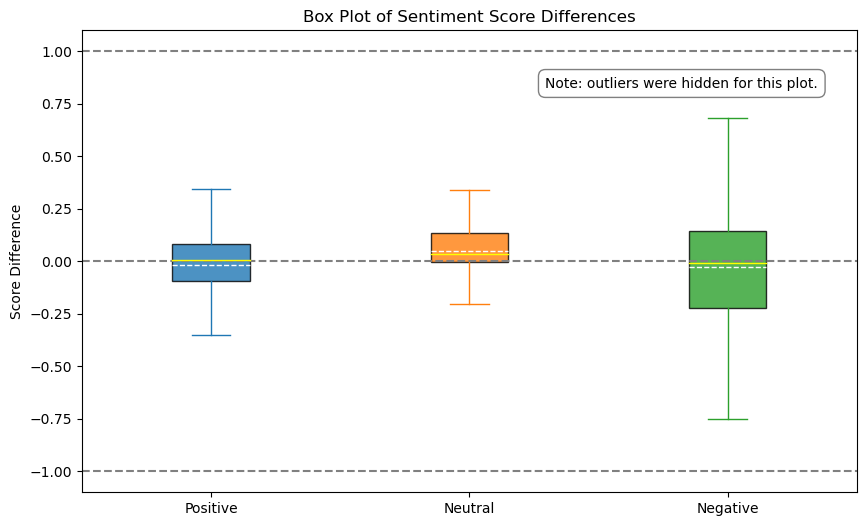

In [12]:
# Define the colors for each sentiment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for POS, orange for NEU, green for NEG

# Create box plots with custom colors and mean line, and hide outliers
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df['diff_POS'], df['diff_NEU'], df['diff_NEG']], labels=['Positive', 'Neutral', 'Negative'],
                 patch_artist=True, showmeans=True, meanline=True, showfliers=False)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Set the properties of the boxplot elements
for i, color in enumerate(colors):
    plt.setp(bp['boxes'][i], facecolor=color, alpha=0.8)
    plt.setp(bp['whiskers'][2*i:2*i+2], color=color)
    plt.setp(bp['caps'][2*i:2*i+2], color=color)
    # As outliers are hidden, no need to set fliers properties
    plt.setp(bp['means'][i], color='white')
    plt.setp(bp['medians'][i], color='yellow')

plt.title('Box Plot of Sentiment Score Differences')
plt.ylabel('Score Difference')
plt.show()

In [13]:
from scipy.stats import ttest_rel

# Assuming df is your DataFrame with the relevant columns

# Conduct paired t-tests
t_test_POS = ttest_rel(df['gpt4_POS'], df['Original_POS'])
t_test_NEU = ttest_rel(df['gpt4_NEU'], df['Original_NEU'])
t_test_NEG = ttest_rel(df['gpt4_NEG'], df['Original_NEG'])

alpha = 0.05

# Conduct paired t-tests and filter results based on significance level
t_test_POS = ttest_rel(df['gpt4_POS'], df['Original_POS'])
if t_test_POS.pvalue < alpha:
    print(f"Paired T-Test for POS is significant: statistic={t_test_POS.statistic}, p-value={t_test_POS.pvalue}")
else:
    print(f"Paired T-Test for POS there is not significant: p-value={t_test_POS.pvalue}")

t_test_NEU = ttest_rel(df['gpt4_NEU'], df['Original_NEU'])
if t_test_NEU.pvalue < alpha:
    print(f"Paired T-Test for NEU there is significant: statistic={t_test_NEU.statistic}, p-value={t_test_NEU.pvalue}")
else:
    print(f"Paired T-Test for NEU is there is not significant: p-value={t_test_NEU.pvalue}")

t_test_NEG = ttest_rel(df['gpt4_NEG'], df['Original_NEG'])
if t_test_NEG.pvalue < alpha:
    print(f"Paired T-Test for NEG there is significant: statistic={t_test_NEG.statistic}, p-value={t_test_NEG.pvalue}")
else:
    print(f"Paired T-Test for NEG there is not significant: p-value={t_test_NEG.pvalue}")

Paired T-Test for POS is significant: statistic=-1.9846897187511583, p-value=0.047554491378128276
Paired T-Test for NEU there is significant: statistic=5.410009480978727, p-value=8.56133465283247e-08
Paired T-Test for NEG there is significant: statistic=-2.807333324146188, p-value=0.005129168533372182


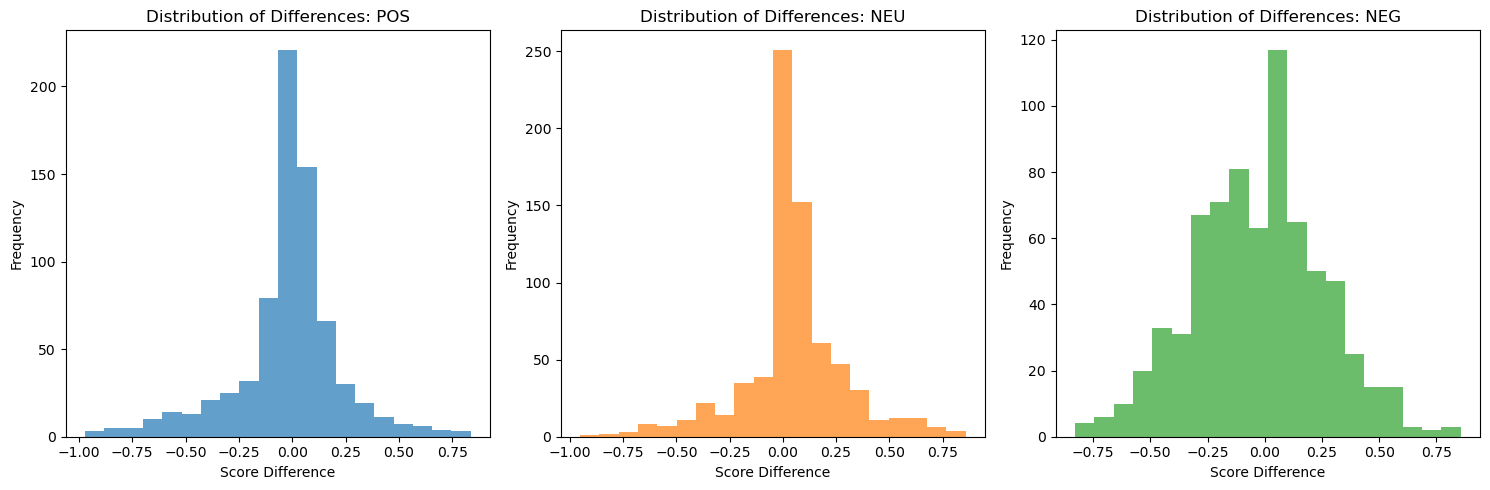

In [14]:
# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].hist(df[f'diff_{sentiment}'], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Distribution of Differences: {sentiment}')
    axes[i].set_xlabel('Score Difference')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

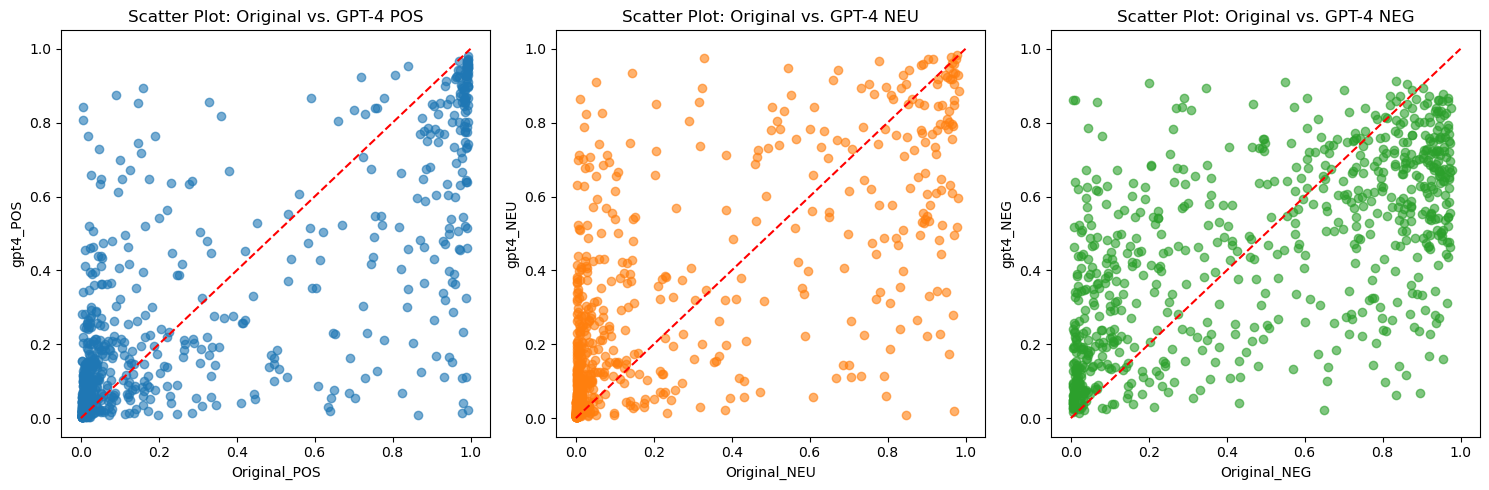

In [15]:
# Plot scatter plots with a line of equality
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].scatter(df[f'Original_{sentiment}'], df[f'gpt4_{sentiment}'],color=colors[i], alpha=0.6)
    axes[i].plot([0, 1], [0, 1], 'r--')  # Line of equality
    axes[i].set_title(f'Scatter Plot: Original vs. GPT-4 {sentiment}')
    axes[i].set_xlabel(f'Original_{sentiment}')
    axes[i].set_ylabel(f'gpt4_{sentiment}')

plt.tight_layout()
plt.show()
